# **5.1 Datenvorbereitung - Beispiel Autopreise**
------------------------------------------------

## a) Notwendige Bibliotheken laden

**LIBRARIES:**

* pandas f√ºr Verarbeitung von Tabellen-Daten
* numpy f√ºr die Berechnung von Zusammenh√§ngen (z.B. Korrelationen)
* missingno f√ºr die Visualisierung von fehlenden Datenpunkten
* matplotlib, seaborn, plotly f√ºr die Visualisierung


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
import plotly.express as px
#from prophet import Prophet
import warnings
warnings.simplefilter("ignore")

## b) Daten einlesen und √úberblick √ºber die ersten Zeilen verschaffen

In [2]:
cars = pd.read_csv('CarPrices_miss.csv')
cars.head()

car_ID  symboling                   CarName  ... citympg highwaympg    price
0       1          3        alfa-romero giulia  ...      21         27  13495.0
1       2          3       alfa-romero stelvio  ...      21         27  16500.0
2       3          1  alfa-romero Quadrifoglio  ...      19         26  16500.0
3       4          2               audi 100 ls  ...      24         30  13950.0
4       5          2                audi 100ls  ...      18         22  17450.0

[5 rows x 26 columns]

# *Datensatz CarPrices.csv - Metadaten*
---------------------------------------------------

Dieser fiktive Datensatz enth√§lt Informationen zu diversen Automobilmarken, Modellen und deren Eigenschaften. Ziel dieses √úbungsdatensatzes besteht in der Untersuchung von Zusammenh√§ngen zwischen den Wagenpreisen (in USD) der Fahrzeuge und deren Eigenschaften.

Quelle: www.kaggle.com (Shalini Goyal, 2019)

# **Attribute:**

* Typ, Kraftstoffart, Ansaugung, T√ºranzahl, Karosserie, Antrieb, Motorposition, Radstand, L√§nge, Breite, H√∂he, Leergewicht, Motortyp, Zylinderanzahl, Motorgr√∂√üe, Kraftstoffsystem, Kompressionsverh√§ltnis, PS, maximale Drehzahl, Verbrauch in Miles per gallon - Stadt, Verbrauch in Miles per gallon - Autobahn, Preis

* **Achtung: wir wissen kaum was √ºber die verwendeten Einheiten --> siehe Automa√üe!**

* √úbersicht √ºber Dateistruktur und Datenformate:

In [3]:
cars.shape

(205, 26)

In [4]:
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5]:
cars.describe()

car_ID   symboling   wheelbase  ...     citympg  highwaympg         price
count  205.000000  205.000000  205.000000  ...  205.000000  205.000000    205.000000
mean   103.000000    0.834146   98.756585  ...   25.219512   30.751220  13276.710571
std     59.322565    1.245307    6.021776  ...    6.542142    6.886443   7988.852332
min      1.000000   -2.000000   86.600000  ...   13.000000   16.000000   5118.000000
25%     52.000000    0.000000   94.500000  ...   19.000000   25.000000   7788.000000
50%    103.000000    1.000000   97.000000  ...   24.000000   30.000000  10295.000000
75%    154.000000    2.000000  102.400000  ...   30.000000   34.000000  16503.000000
max    205.000000    3.000000  120.900000  ...   49.000000   54.000000  45400.000000

[8 rows x 16 columns]

## c) Fehlende Werte

*   Abfrage mit function isnull
*   **Visualisierung** mit missingno



In [6]:
for col in cars.columns:
    pct_missing = cars[col].isnull().sum()
    print(f'{col} - {pct_missing :}')

car_ID - 0
symboling - 0
CarName - 0
fueltype - 0
aspiration - 0
doornumber - 0
carbody - 0
drivewheel - 0
enginelocation - 44
wheelbase - 0
carlength - 0
carwidth - 0
carheight - 0
curbweight - 0
enginetype - 0
cylindernumber - 0
enginesize - 0
fuelsystem - 0
boreratio - 0
stroke - 0
compressionratio - 0
horsepower - 0
peakrpm - 0
citympg - 0
highwaympg - 0
price - 0


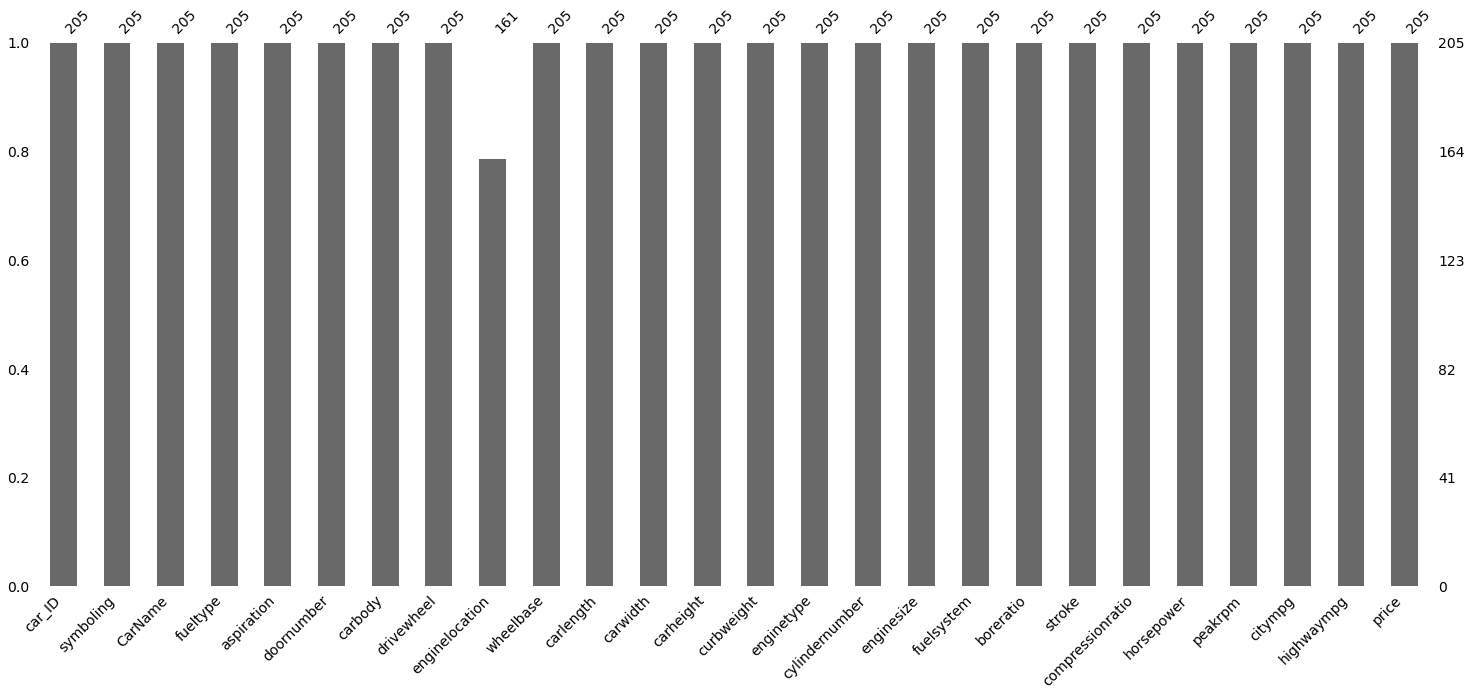

In [7]:
missingno.bar(cars, fontsize = 14)
plt.show()

## d) Duplikate

redundante Datenpunkte finden und entfernen

In [8]:
cars.duplicated().sum()

0

## e) Bereinigen des Datensatzes

* Eintr√§ge mit fehlenden Daten entfernen - Achtung! Bei gro√üen Verlusten gezieltes Anpassen der Filter! --> dropna
* Redundante Datens√§tze l√∂schen --> drop_duplicates

In [9]:
# Welche Spalten sind betroffen? Alternative L√∂sung
incomplete_columns = list(cars.columns[cars.isnull().any()])
incomplete_columns

['enginelocation']

In [10]:
# Wieviel Daten fehlen - Angabe in Prozent? Alternative L√∂sung
for col in incomplete_columns:
    percent_missing = cars[cars[col].isnull() == True].shape[0] / cars.shape[0] *100
    print("percent missing for column {}: {}".format(col, percent_missing))

percent missing for column enginelocation: 21.463414634146343


**L√∂schen mit der Function dropna (pandas):** entwickelt f√ºr statistische Analysen, die Probleme erzeugen, wenn nicht numerische Eintr√§ge in den Zellen stehen (NaN).
Sehr hilfreiches Tool - bietet viele Optionen zur gezielten Entfernung von fehlenden Dateneintr√§gen

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html


Probleme entstehen, wenn sehr viele Eintr√§ge fehlen - andere L√∂sungen suchen!

In [11]:
# Entfernen der Zeilen mit fehlenden Daten - fast ein Viertel der Daten fallen raus!
# Es fehlen aber nur Werte in einer Spalte...
cars2 = cars.dropna()
cars2.shape

(161, 26)



Eine andere Option ist das Auff√ºllen der fehlenden Werte.

**functions fillna, bfill, ffill**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html


In [12]:
cars3 = cars.copy()
for col in incomplete_columns:
   cars3[col] = cars[col].fillna('unknown')
cars3.shape

(205, 26)

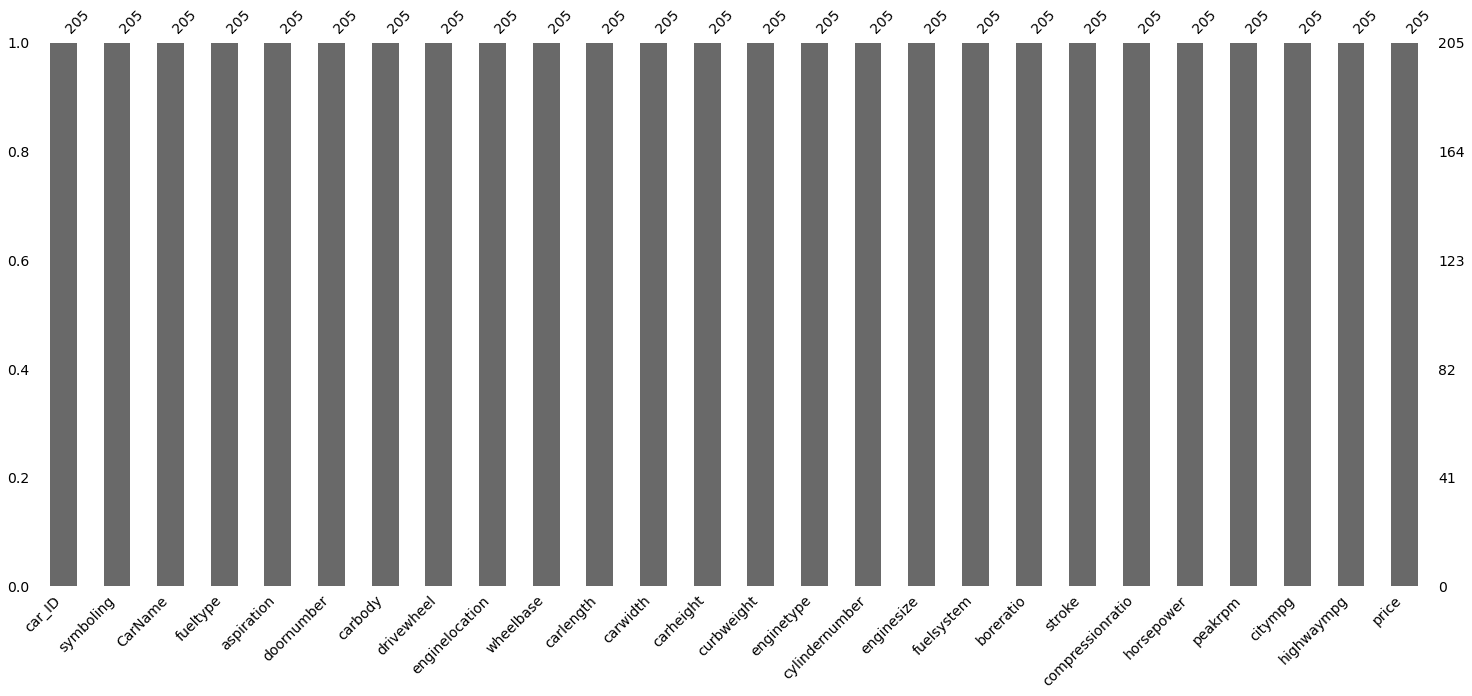

In [13]:
missingno.bar(cars3, fontsize = 14)
plt.show()

## f) Konsolidieren

* Zusammenfassen von Attributen
* Typos entfernen
* Formate vereinheitlichen - z.B. Datum...

In [14]:
# Trennen Marke vom Modell
CompanyName = cars3['CarName'].apply(lambda x : x.split(' ')[0])
cars3.insert(3,"CompanyName",CompanyName)
cars3.drop(['CarName'],axis=1,inplace=True)
cars3.head()

car_ID  symboling  CompanyName  ... citympg highwaympg    price
0       1          3  alfa-romero  ...      21         27  13495.0
1       2          3  alfa-romero  ...      21         27  16500.0
2       3          1  alfa-romero  ...      19         26  16500.0
3       4          2         audi  ...      24         30  13950.0
4       5          2         audi  ...      18         22  17450.0

[5 rows x 26 columns]

In [15]:
cars3.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Das sind offensichtlich einige Typos + √§hnliche Namen f√ºr die gleiche Marke vergeben --> bereinigen!
1) Gro√übuchstaben entfernen
2) Marken vereinheitlichen durch gleiche Schreibweise

In [17]:
cars3.CompanyName = cars3.CompanyName.str.lower()

def replace_name(a,b):
    cars3.CompanyName.replace(a,b,inplace=True)

replace_name('alfa-romero','alfa-romeo')
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars3.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## g) Erste √úbersicht visualisieren

* hilfreich zur Bewertung der Datenqualit√§t
* flie√üender √úbergang zur EDA

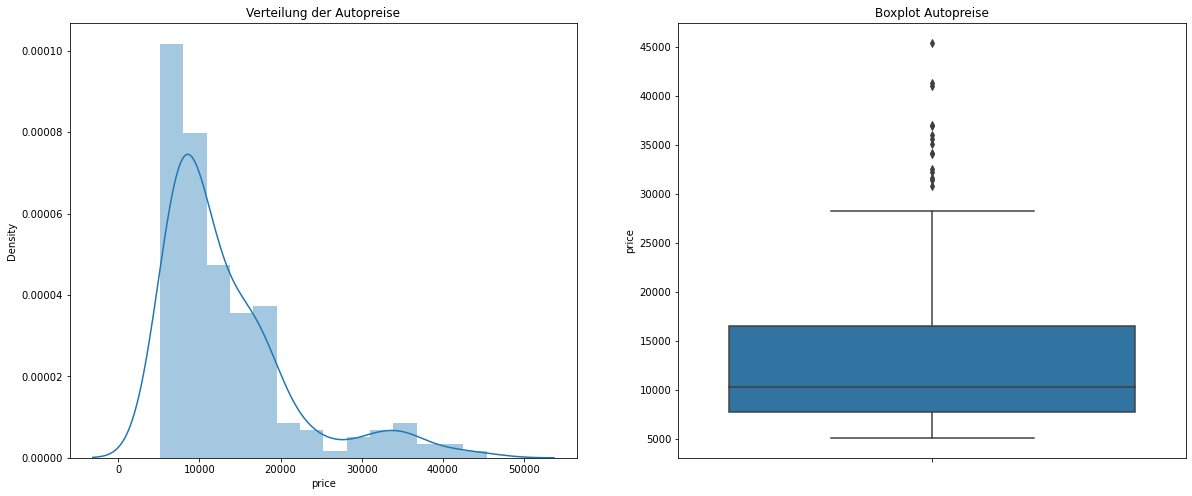

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Verteilung der Autopreise')
sns.distplot(cars3.price)

plt.subplot(1,2,2)
plt.title('Boxplot Autopreise')
sns.boxplot(y=cars3.price)

plt.show()

-----------

# 5.2 EDA

## Univariate Analyse mit Grafiken: 
* Verteilung der Automarken (CarCompanies) --> welche Marken kommen mit welchem Anteil im Datensatz vor (h√§ufigste Marke, seltenste Marke)?
* Wie ist das Verh√§ltnis Diesel vs. Benziner (fueltype)?

## Multivariate Analyse mit Grafiken: 
* Verteilung Automarken nach gemittelten Preisen der Fahrzeuge sortiert (teuerste und billigste Marke)
* Zylinderanzahl (cylindernumber) : Verteilung der H√§ufigkeit (4- bis 12-Zylinder) und Verteilung in Abh√§ngigkeit vom Preis der Autos
* Streudiagramme zur Untersuchung von funktionalen Abh√§ngigkeiten: z.B. Autol√§nge vs. Preis; Leergewicht vs. Preis
* Korrelationskoeffizienten berechnen

## Zusammenfassung der Analyse in Stichpunkten

üíª Zusammentragen in Google-Slides: 
https://docs.google.com/presentation/d/1d9sOwFZhRvVv3qi8C9AKUHzHTnJ8yesI0XjOyWVtPTY/edit?usp=sharing

